In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matrix
import model
import analysis as an
import plot

In [2]:
def analysis(init, patterns, end_time):
    """sparsity_analysis.
    Generate simulation data to analyze how K_ac
    sparsity affects model dynamics.

    :param init:  inital abudance vector
    :param pattern: matrix patterns to test
    :param end_time: time steps to simulate
    """
    rows, n = [], len(init)
    
    fixation_times = []
    for pattern in patterns:
        curr_mat = matrix.pattern_matrix(pattern, n)
        
        # simulate model with given params
        t, N, S, E, P = model.simulate(curr_mat, init, end_time)
        # N, S are variables by time points matrices
        
        
        # Calculate statistics
        row = {"pattern": pattern}
        
        row["initial_conditions"] = init
        
        # Compute time to fixation
        row['fixation_time'] = len(N[0])
        
        # Compute growth rate
        row["growth_rate"] = an.growth_rate(N.T)
        
        N = np.apply_along_axis(an.normalize, 1, N.T).T
        
        # Compute skewness 
        row["skewness"] = np.average(an.skewness(N.T))
        
        # Compute richness
        richnessVals = [an.richness(i) for i in N.T]
        row["richness"] = np.average(richnessVals)
        
        # Compute shannon index
        row["shannon_index"] = np.average(an.shannon_index(N.T))
        
        # Add Bray Curtis distance metric array for each K_ac simulation
        brayCurtisMtx = np.identity(n)
        for i in range(n):
            for j in range(i + 1, n):
                brayCurtisMtx[i, j] = an.bray_curtis(N[i], N[j])
        row["bray curtis"] = brayCurtisMtx
        
        # store for easy conversion to a dataframe
        rows.append(row)
        
    return pd.DataFrame(rows)

In [3]:
patterns = ['null', 'ident', 'naive', 'immune', 'barbell', 'cycle', 'complete', 'star']

In [4]:
def make_random_init(num_strains):
    """generate many random init vectors.
    Generate simulation data to analyze 
    distributions.

    :param num_strains: number of strains
    """
    max_val = 0.5
    min_val = 0
    
    init = []
    for i in range(num_strains):
        init.append(np.random.uniform(min_val, max_val))
    
    return init

In [5]:
# Generate 100 random inits
inits = []
for i in range(100):
    inits.append(make_random_init(4))

In [6]:
# Create dataframe containing statistics for all inits
big_df = pd.DataFrame()

for init in inits:
    res = analysis(init, patterns, 50)
    big_df = big_df.append(res)

big_df.reset_index(drop=True)

,pattern,initial_conditions,fixation_time,growth_rate,skewness,richness,shannon_index,bray curtis
0,null,"[0.3980657226229034, 0.11848923590467941, 0.44...",137,-0.007078,6.835683e-01,1.0,44.441708,"[[1.0, 0.5412328003106265, 0.05858428509865554..."
1,ident,"[0.3980657226229034, 0.11848923590467941, 0.44...",97,-0.006762,-5.225847e-01,1.0,32.237883,"[[1.0, 0.3595812636672082, 0.04322477138432301..."
2,naive,"[0.3980657226229034, 0.11848923590467941, 0.44...",91,-0.007167,3.140261e-01,1.0,29.519675,"[[1.0, 0.5412328003106284, 0.05858428509865454..."
3,immune,"[0.3980657226229034, 0.11848923590467941, 0.44...",198,-0.004791,-1.845961e-01,1.0,60.547326,"[[1.0, 0.5412328003106279, 0.4125483410131786,..."
4,barbell,"[0.3980657226229034, 0.11848923590467941, 0.44...",203,-0.004207,1.945156e-01,1.0,40.420516,"[[1.0, 0.8990323316788861, 0.6272873713337748,..."
...,...,...,...,...,...,...,...,...
795,immune,"[0.036967317526238164, 0.006404261479623752, 0...",123,-0.007582,4.262301e-01,1.0,28.177143,"[[1.0, 0.7427267649145108, 0.7853436007227897,..."
796,barbell,"[0.036967317526238164, 0.006404261479623752, 0...",193,-0.004150,2.760970e-01,1.0,33.753588,"[[1.0, 0.9863404160753675, 0.7447922160200819,..."
797,cycle,"[0.036967317526238164, 0.006404261479623752, 0...",71,-0.003567,3.330669e-16,1.0,16.331103,"[[1.0, 0.725038779171363, 0.7853436007227899, ..."
798,complete,"[0.036967317526238164, 0.006404261479623752, 0...",69,-0.003663,-9.453930e-01,1.0,15.489728,"[[1.0, 0.706511126129749, 0.814815594908744, 0..."


In [7]:
# Create pattern dataframes
null_df = big_df.loc[big_df['pattern'] == 'null']
ident_df = big_df.loc[big_df['pattern'] == 'ident']
naive_df = big_df.loc[big_df['pattern'] == 'naive']
immune_df = big_df.loc[big_df['pattern'] == 'immune']
barbell_df = big_df.loc[big_df['pattern'] == 'barbell']
cycle_df = big_df.loc[big_df['pattern'] == 'cycle']
complete_df = big_df.loc[big_df['pattern'] == 'complete']
star_df = big_df.loc[big_df['pattern'] == 'star']

# Create list to hold all pattern dataframes
all_pattern_dfs = [null_df, ident_df, naive_df, immune_df, barbell_df, cycle_df, complete_df, star_df]

In [8]:
def single_stat_plots(stat, all_pattern_dfs):
    """
    Create separate plots for each matrix pattern
    showing frequency of statistic values.

    :param stat: string must correspond with dataframe column
    :param all_pattern_dfs: list of dataframes 
    """
    plt.figure(figsize=(16, 9))
    
    i=1
    # statistic plots
    # x axis = metric range, y axis = frequency

    plt.figure(figsize=(16, 9))

    i=1
    for pattern_df in all_pattern_dfs:
        vals = pattern_df[stat].values
        plt.subplot(2, 4, i)
        plt.title(pattern_df['pattern'].values[0])
        sns.kdeplot(vals)
        i += 1
    
    plt.suptitle(stat)
    plt.show()

In [9]:
#single_stat_plots('skewness', all_pattern_dfs)

In [10]:
# Melt big_df
melted_df = pd.melt(big_df, id_vars =['pattern'], value_vars =['growth_rate', 'skewness', 'shannon_index', 'fixation_time'])

In [15]:
def multi_stat_plots(stat, all_pattern_dfs):
    """
    Create one plot for each statistic
    showing differences between multiple
    pattern matrices

    :param stat: string must correspond with dataframe column
    :param all_pattern_dfs: list of dataframes 
    """
    plt.figure(figsize=(10, 6))
    i=1
    for pattern_df in all_pattern_dfs:
        vals = pattern_df[stat].values
        sns.kdeplot(vals, label=pattern_df['pattern'].values[0])
        plt.title(stat)
        i += 1
    
    plt.legend()
    plt.show()

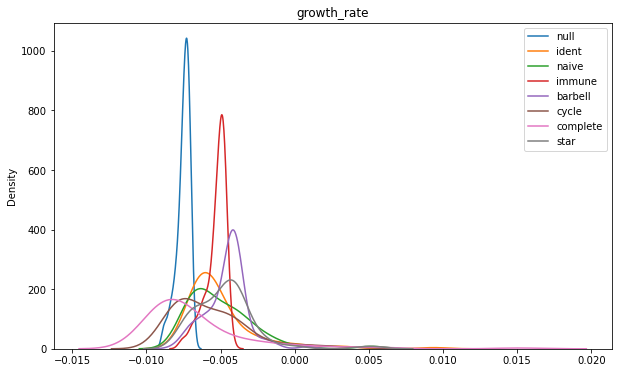

In [16]:
multi_stat_plots('growth_rate', all_pattern_dfs)

/Users/deepikayeramosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


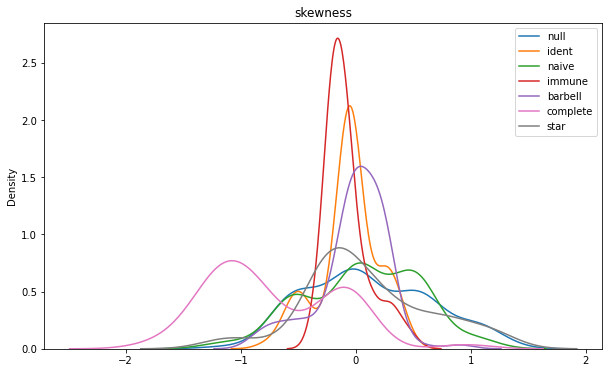

In [17]:
multi_stat_plots('skewness', all_pattern_dfs)

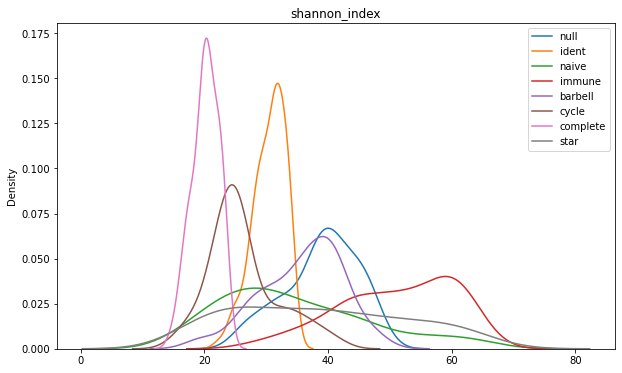

In [18]:
multi_stat_plots('shannon_index', all_pattern_dfs)

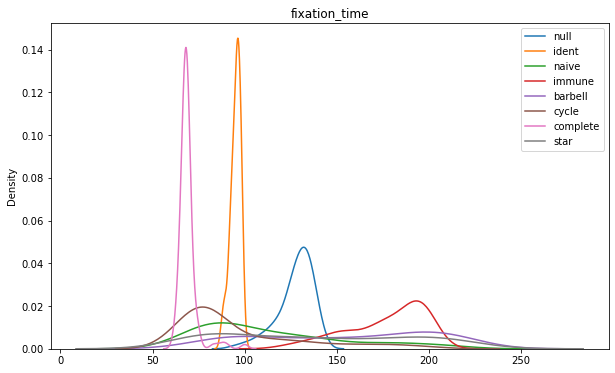

In [19]:
multi_stat_plots('fixation_time', all_pattern_dfs)